# Data Collection and Analysis

#### This document is for working with the data we pull from training the different mdoels.

Import libraries

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import scipy as stats

Load data from file

In [5]:
file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_onestep.pkl'
# file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_vector.pkl'
# file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_grid.pkl'

with open(file_path, 'rb') as file:
    data = pickle.load(file)
print(data)

([0, 0, 0, 10, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 10, 0, 10, 0, 10, 0, 0, 0, 0, 10, 10, 0, 10, 0, 0, 10, 0, 0, 10, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 10, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 10, 0, 0, 10, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 10, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 10, 10, 0, 10, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 10, 0, 

Antal spil

In [6]:
scores = data[0]

print("Number of games run:",len(scores)*10)

Number of games run: 57250


Plot score data

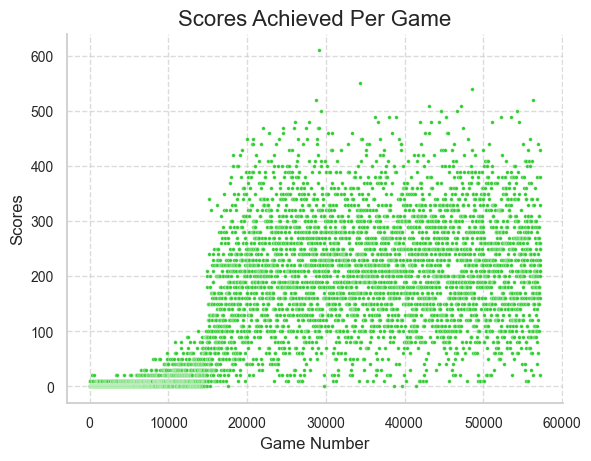

In [7]:
games = list(range(len(scores)))

for i in games:
    games[i] *= 10

""" plt.scatter(games, scores)
plt.title('Scores Achieved Per Game')
plt.xlabel('Game Number')
plt.ylabel('Scores')
plt.grid(True)
plt.show() """

sns.set(style="whitegrid")

sns.scatterplot(x=games, y=scores, s=7, color="limegreen")
plt.title('Scores Achieved Per Game', fontsize=16)
plt.xlabel('Game Number')
plt.ylabel('Scores')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()

plt.show()

Plot Running Mean Score

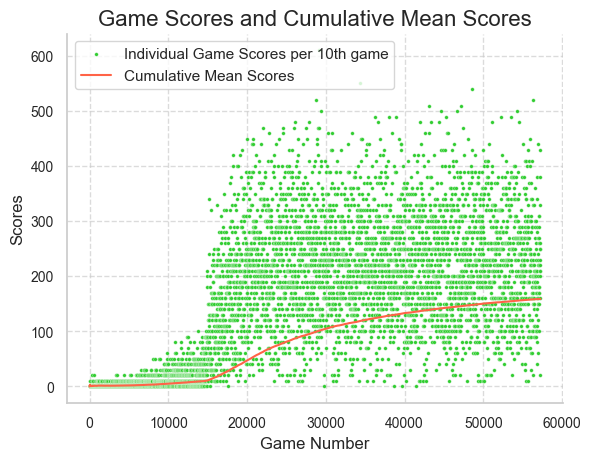

In [8]:
cumulative_mean_scores = data[1]

"""
plt.scatter(games, scores, label='Individual Game Scores per 10th game')
plt.plot(games, cumulative_mean_scores, label='Cumulative Mean Scores', color='red')
plt.title('Game Scores and Cumulative Mean Scores')
plt.xlabel('Game Number')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()"""

sns.set(style="whitegrid")
sns.scatterplot(x=games, y=scores, s=7, label='Individual Game Scores per 10th game', color='limegreen')
sns.lineplot(x=games, y=cumulative_mean_scores, label='Cumulative Mean Scores', color='tomato')

plt.title('Game Scores and Cumulative Mean Scores', fontsize=16)
plt.xlabel('Game Number')
plt.ylabel('Scores')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()

plt.show()

Plot 95% Confidence Intervals

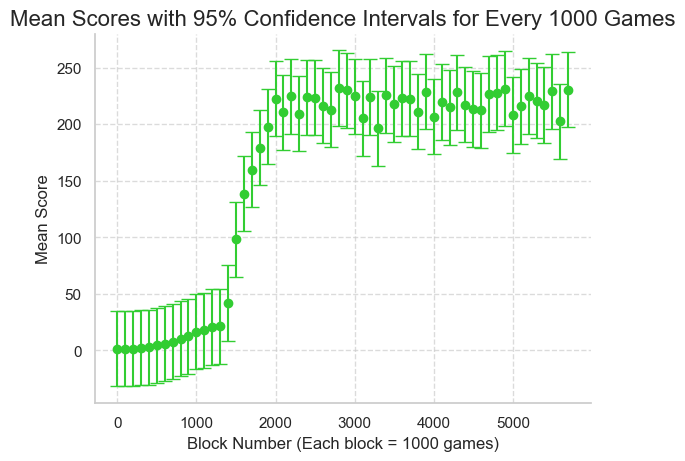

In [9]:
block_size = 100 # We pulled data per 10 games run.
blocks = list(range(0, len(scores), block_size))
mean_scores = []
confidence_intervals = []

for i in range(0, len(scores), block_size):
    block = scores[i:i + block_size]
    if len(block) == 0:
        continue

    mean = np.mean(block)
    std_dev = np.std(block)

    ci = 1.96 * (std_dev / math.sqrt(len(block)))
    mean_scores.append(mean)
    confidence_intervals.append(ci)

"""
blocks = list(range(len(mean_scores)))
plt.errorbar(blocks, mean_scores, yerr=ci, fmt='o', capsize=5, label='Mean with 95% Confidence Intervals')
plt.title('Mean Scores with 95% Confidence Intervals for Every 1000 Games')
plt.xlabel('Block Number (Each block = 1000 games)')
plt.ylabel('Mean Score')
plt.grid(True)
plt.legend()
plt.show()"""

sns.set(style="whitegrid")

plt.errorbar(blocks, mean_scores, yerr=ci, fmt='o', capsize=5, label='Mean with 95% Confidence Intervals', color='limegreen')

plt.title('Mean Scores with 95% Confidence Intervals for Every 1000 Games', fontsize=16)
plt.xlabel('Block Number (Each block = 1000 games)')
plt.ylabel('Mean Score')

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()

plt.show()

#### Data analysis on Models running on pre-trained Data.

95% Confidence Interval

In [10]:
new_data_file = ''

with open(new_data_file, 'rb') as file:
    scores = pickle.load(file)

scores_array = np.array(scores)

mean = np.mean(scores_array)
sem = stats.sem(scores_array)

confidence_level = 0.95

conf_int = stats.t.interval(confidence_level, len(scores_array)-1, loc=mean, scale=sem)

print(f"Mean: {mean}")
print(f"Confidence Interval: {conf_int}")

FileNotFoundError: [Errno 2] No such file or directory: ''

Mean steps between apples